<a href="https://colab.research.google.com/github/Adler-1014/SNU_ML_GROUP2/blob/developSrk/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A0%84%EC%B2%98%EB%A6%AC%EB%B6%80%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
file_path = '/content/drive/MyDrive/머신러닝과제/Train.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 'item_weight' 열의 결측치를 대치하기 위해 해당 열을 추출하여 2차원 배열로 변환
X = df[['Item_Weight', 'Item_MRP', 'Item_Visibility']].values

# KNN 알고리즘을 사용하여 결측치 대치
X_imputed = imputer.fit_transform(X)

# 대치된 값으로 DataFrame 업데이트
df['Item_Weight_imputed'] = X_imputed


In [ ]:
df['Item_Weight_imputed'].describe()

count    8523.000000
mean       12.860689
std         4.317876
min         4.555000
25%         9.300000
50%        12.650000
75%        16.239500
max        21.350000
Name: Item_Weight_imputed, dtype: float64

In [ ]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

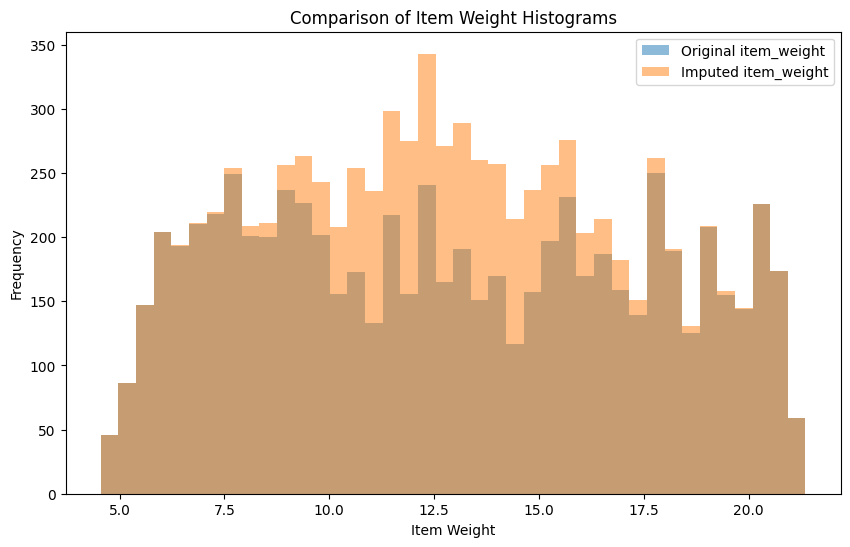

In [ ]:
plt.figure(figsize=(10, 6))

# 첫 번째 열에 대한 히스토그램
plt.hist(df['Item_Weight'], bins=40, alpha=0.5, label='Original item_weight')

# 두 번째 열에 대한 히스토그램
plt.hist(df['Item_Weight_imputed'], bins=40, alpha=0.5, label='Imputed item_weight')

# 레이블과 제목 추가
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Comparison of Item Weight Histograms')
plt.legend()

# 그래프 표시
plt.show()

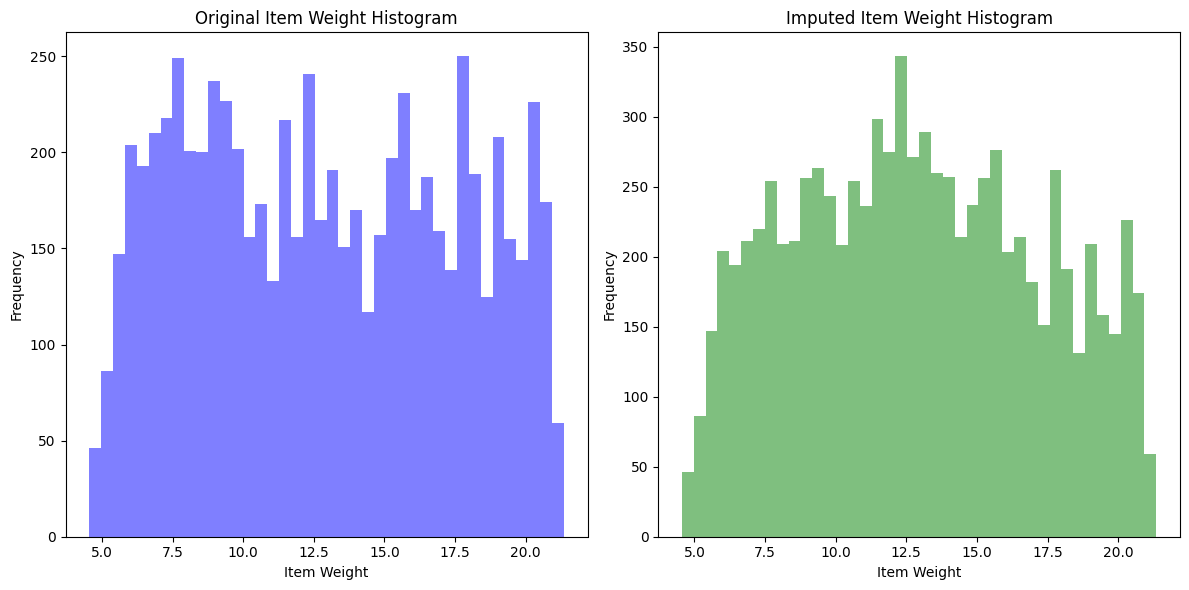

In [ ]:
# 플롯 설정
plt.figure(figsize=(12, 6))

# 첫 번째 subplot: 원래 값의 히스토그램
plt.subplot(1, 2, 1)
plt.hist(df['Item_Weight'], bins=40, color='blue', alpha=0.5)
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Original Item Weight Histogram')

# 두 번째 subplot: 대치된 값의 히스토그램
plt.subplot(1, 2, 2)
plt.hist(df['Item_Weight_imputed'], bins=40, color='green', alpha=0.5)
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Imputed Item Weight Histogram')

# 플롯 보이기
plt.tight_layout()
plt.show()